## This is the 2-layer neural network workbook for ECE 239AS Assignment #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.38123121099e-08


### Forward pass loss

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0


In [6]:
print(loss)

1.07169612386


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

b1 max relative error: 3.1726804786908923e-09
W2 max relative error: 2.96322045694799e-10
b2 max relative error: 1.2482669498248223e-09
W1 max relative error: 1.2832845443256344e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.0144978645878


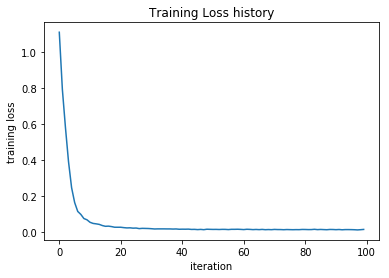

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [19]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302799087894744
iteration 100 / 1000: loss 2.3020978009578696
iteration 200 / 1000: loss 2.2971055069229687
iteration 300 / 1000: loss 2.25653438333671
iteration 400 / 1000: loss 2.1488124391398284
iteration 500 / 1000: loss 2.07206696122405
iteration 600 / 1000: loss 2.0221237734297546
iteration 700 / 1000: loss 2.0253953947024037
iteration 800 / 1000: loss 1.95275530959424
iteration 900 / 1000: loss 1.965974642337038
Validation accuracy:  0.282


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [21]:
stats['train_acc_history']

[0.105, 0.20000000000000001, 0.20000000000000001, 0.245, 0.30499999999999999]

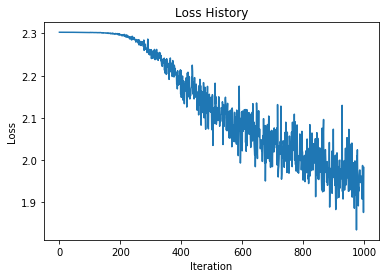

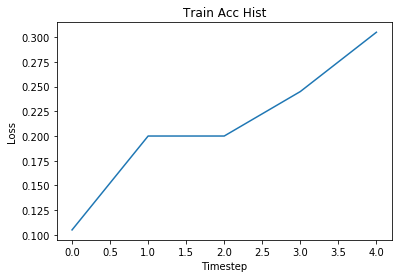

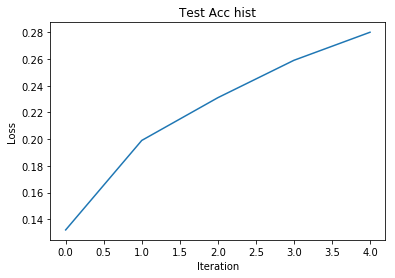

In [30]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
import matplotlib.pyplot as plt
plt.figure()
plt.plot(stats['loss_history'])
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.figure()
plt.plot(stats['train_acc_history'])
plt.title('Train Acc Hist')
plt.xlabel('Timestep')
plt.ylabel('Loss')
plt.figure()
plt.plot(stats['val_acc_history'])
plt.title('Test Acc hist')
plt.xlabel('Iteration')
plt.ylabel('Loss')
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) Looking at the loss plot, it seems that the network seems to not learn much until 200 iterations in, and then the loss starts descending. The loss is very noisy (probably due to SGD) but overall it seems to be going down. Similarly, the accuracy plots indicate that the accuracy was going up at a relatively consistent rate (i.e. we didn't level off) when we finished iterating. From this, I concluded that the training accuracy wasn't great because we simply didn't give it enough iterations for the loss to converge. This would be my first step in attempting to increase the accuracy. After gauging how many iterations it takes for the loss to roughly converge, I would 

(2) My first step in attempting to increase the accuracy would be to increase the number of iterations. After gauging how many iterations it takes for the loss to roughly converge, I would then begin to select my hyperparameters, using performance on a validation dataset. In order to do this, I would probably choose many different settings of hyperparameters that we can change - including batch size, learning rate, decay rate, and regularization strength, and run several different networks to see which setting of hyperparameters result in the best training accuracy. 

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [13]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #


#NOTE: this was the code I used to find the best hyperparameters
# I basically manually listed a bunch of candidate hyperparameters, and then trained up to 50 networks
# on random hyperparameters. I wrote code to break when we find something over 50%
# Luckily for me, this happened on the first try with hyperparams: num_iters = 10000, batch size = 200, learning_rate = 0.001, decay = 0.85, reg = 0.25
# best hyperparams found: num_iters = 10000, batch size = 200, learning_rate = 0.001, decay = 0.85, reg = 0.25
# as can be seen in the results printed below
batchsizes = [ 50, 100, 200, 500, 1000]
n_iters = 10000
learning_rates = [1e-5, 1e-4, 5e-4, 3e-4, 1e-3, 1e-2, 3e-3, 5e-4]
decays = [0.5, 0.75, 0.9, 0.95, 0.99, 0.85]
reg_strength = [0.1, 0.25, 0.35, 0.45, 0.6, 0.75, 0.9]
# now, train 50 networks with random hyperparameters.
best_val_acc, best_net = 0.0, None
for i in range(50):
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    batchsize = np.random.choice(batchsizes)
    lr = np.random.choice(learning_rates)
    decay = np.random.choice(decays)
    reg = np.random.choice(reg_strength)
    print('training with num_iters = {}, batch size = {}, learning_rate = {}, decay = {}, reg = {}'.format(n_iters, batchsize, lr, decay, reg))
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=n_iters, batch_size=batchsize,
            learning_rate=lr, learning_rate_decay=decay,
            reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    if val_acc >= 0.5:
        print('best hyperparams found: num_iters = {}, batch size = {}, learning_rate = {}, decay = {}, reg = {}'.format(n_iters, batchsize, lr, decay, reg))
        best_net = net
        break # found a good enough net
    elif val_acc > best_val_acc:
        best_val_acc = val_acc
        best_net = net
        print('found acc {}'.format(best_val_acc))

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
best_net = net

training with num_iters = 10000, batch size = 200, learning_rate = 0.001, decay = 0.85, reg = 0.25
Validation accuracy:  0.502
best hyperparams found: num_iters = 10000, batch size = 200, learning_rate = 0.001, decay = 0.85, reg = 0.25


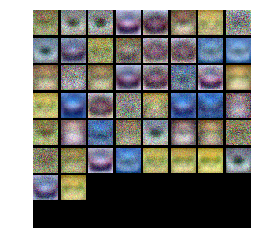

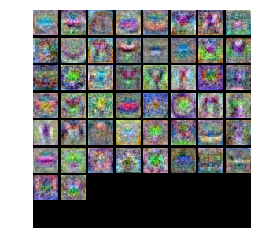

In [14]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The images that come from the suboptimal net weights appear quite noisy, with very subtle, hard to make out templates for some of the images they may be capable of detecting. on the other hand, the best net I arrived out has much more robust shapes and colors in their weight visualization. FOr example, some of the images coming from the weight visualization appear like a well-defined red car. In the best net weights, we see a much clearer shape in terms of objects and colors, while the suboptimal net, these shapes and colors were much less well defined and a lot noisier. Also, in the suboptimal net, a lot of the templates seem to be faint outlines of a red car, which indicates that the weights did not learn very much about the other types of images, while each weight visualization in the optimal net is quite different (and more well defined). 

## Evaluate on test set 

In [15]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.506
